In [1]:
import math
import numpy as np
import sklearn
from sklearn.cluster import KMeans
import matplotlib as mpl
import matplotlib.pyplot as plt
import librosa
import librosa.display
import os
import re
import seaborn as sns
import pandas as pd
import random
from scipy import stats  #t-test
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw
from scipy.interpolate import interp1d
from scipy.signal import savgol_filter

import xlrd
import statsmodels.api as sm
from itertools import groupby

from statistics import mean
from matplotlib import cm

C:\Users\ljr\AppData\Roaming\Python\Python38\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\ljr\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\ljr\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
pathtextm=r'D:\KyotoUdata\all\motheroneday\csv'
pathtextc=r'D:\KyotoUdata\all\childoneday\csv'

In [3]:
filesmother= os.listdir(pathtextm)
fileschild= os.listdir(pathtextc)

In [4]:
fileschild[-2]

'child8.csv'

In [5]:
cellm=np.empty((len(filesmother),1),dtype=object)
for i in range(len(filesmother)):
    fileread= pd.read_csv(pathtextm+'\\'+filesmother[i])
    fileread.columns = [c.replace('SD2/SD1', 'CSI') for c in fileread.columns]
    cellm[i,0]=fileread

In [6]:
cellc=np.empty((len(fileschild),1),dtype=object)
for i in range(len(fileschild)):
    fileread= pd.read_csv(pathtextc+'\\'+fileschild[i])
    fileread.columns = [c.replace('SD2/SD1', 'CSI') for c in fileread.columns]
    cellc[i,0]=fileread

In [7]:
cellsdnnm=np.empty((len(filesmother),3),dtype=object)
cellcsim=np.empty((len(filesmother),3),dtype=object)
cellcvim=np.empty((len(filesmother),3),dtype=object)
for i in range(len(filesmother)):
    data=cellm[i,0]
    data.columns = [c.replace(' ', '') for c in data.columns]
    data1=data.drop([0])
    datat1=data1['STDRR'].astype(float)
    datat2=data1['CSI'].astype(float)
    datat3=data1['CVI'].astype(float)
    if len(datat1)>=4320:
        data11=datat1[0:1440]
        data12=datat1[1440:2880]
        data13=datat1[2880:4320]
    elif len(datat1)>=2880:
        data11=datat1[0:1440]
        data12=datat1[1440:2880]
        data13=[]
    elif len(datat1)>=1440:
        data11=datat1[0:1440]
        data12=[]
        data13=[]
    cellsdnnm[i,0]=data11
    cellsdnnm[i,1]=data12
    cellsdnnm[i,2]=data13
    if len(datat2)>=4320:
        data21=datat2[0:1440]
        data22=datat2[1440:2880]
        data23=datat2[2880:4320]
    elif len(datat2)>=2880:
        data21=datat2[0:1440]
        data22=datat2[1440:2880]
        data23=[]
    elif len(datat2)>=1440:
        data21=datat2[0:1440]
        data22=[]
        data23=[]
    cellcsim[i,0]=data21
    cellcsim[i,1]=data22
    cellcsim[i,2]=data23
    if len(datat3)>=4320:
        data31=datat3[0:1440]
        data32=datat3[1440:2880]
        data33=datat3[2880:4320]
    elif len(datat3)>=2880:
        data31=datat3[0:1440]
        data32=datat3[1440:2880]
        data33=[]
    elif len(datat3)>=1440:
        data31=datat3[0:1440]
        data32=[]
        data33=[]
    cellcvim[i,0]=data31
    cellcvim[i,1]=data32
    cellcvim[i,2]=data33

In [8]:
cellsdnnc=np.empty((len(fileschild),3),dtype=object)
cellcsic=np.empty((len(fileschild),3),dtype=object)
cellcvic=np.empty((len(fileschild),3),dtype=object)
for i in range(len(fileschild)):
    data=cellc[i,0]
    data.columns = [c.replace(' ', '') for c in data.columns]
    data1=data.drop([0])
    datat1=data1['STDRR'].astype(float)
    datat2=data1['CSI'].astype(float)
    datat3=data1['CVI'].astype(float)
    if len(datat1)>=4320:
        data11=datat1[0:1440]
        data12=datat1[1440:2880]
        data13=datat1[2880:4320]
    elif len(datat1)>=2880:
        data11=datat1[0:1440]
        data12=datat1[1440:2880]
        data13=[]
    elif len(datat1)>=1440:
        data11=datat1[0:1440]
        data12=[]
        data13=[]
    cellsdnnc[i,0]=data11
    cellsdnnc[i,1]=data12
    cellsdnnc[i,2]=data13
    if len(datat2)>=4320:
        data21=datat2[0:1440]
        data22=datat2[1440:2880]
        data23=datat2[2880:4320]
    elif len(datat2)>=2880:
        data21=datat2[0:1440]
        data22=datat2[1440:2880]
        data23=[]
    elif len(datat2)>=1440:
        data21=datat2[0:1440]
        data22=[]
        data23=[]
    cellcsic[i,0]=data21
    cellcsic[i,1]=data22
    cellcsic[i,2]=data23
    if len(datat3)>=4320:
        data31=datat3[0:1440]
        data32=datat3[1440:2880]
        data33=datat3[2880:4320]
    elif len(datat3)>=2880:
        data31=datat3[0:1440]
        data32=datat3[1440:2880]
        data33=[]
    elif len(datat3)>=1440:
        data31=datat3[0:1440]
        data32=[]
        data33=[]
    cellcvic[i,0]=data31
    cellcvic[i,1]=data32
    cellcvic[i,2]=data33

In [9]:
def removemiss(cellsdnn,cellcsi,cellcvi):
    for i in range(len(cellsdnn[:,0])): #missing value>20% remove
        datas1=cellsdnn[i,0]
        datas2=cellsdnn[i,1]
        datas3=cellsdnn[i,2]
        if len(datas1) != 0:
            nums1 = (datas1.isna().sum())/len(datas1)
            if nums1>=0.2:
                cellsdnn[i,0]=[]
        if len(datas2) != 0:
            nums2 = (datas2.isna().sum())/len(datas2)
            if nums2>=0.2:
                cellsdnn[i,1]=[]
        if len(datas3) != 0:
            nums3 = (datas3.isna().sum())/len(datas3)
            if nums3>=0.2:
                cellsdnn[i,2]=[]
    for i in range(len(cellcsi[:,0])): #missing value>20% remove
        datac1=cellcsi[i,0]
        datac2=cellcsi[i,1]
        datac3=cellcsi[i,2]
        if len(datac1) != 0:
            numc1 = (datac1.isna().sum())/len(datac1)
            if numc1>=0.2:
                cellcsi[i,0]=[]
        if len(datac2) != 0:
            numc2 = (datac2.isna().sum())/len(datac2)
            if numc2>=0.2:
                cellcsi[i,1]=[]
        if len(datac3) != 0:
            numc3 = (datac3.isna().sum())/len(datac3)
            if numc3>=0.2:
                cellcsi[i,2]=[]
    for i in range(len(cellcvi[:,0])): #missing value>20% remove
        datav1=cellcvi[i,0]
        datav2=cellcvi[i,1]
        datav3=cellcvi[i,2]
        if len(datav1) != 0:
            numv1 = (datav1.isna().sum())/len(datav1)
            if numv1>=0.2:
                cellcvi[i,0]=[]
        if len(datav2) != 0:
            numv2 = (datav2.isna().sum())/len(datav2)
            if numv2>=0.2:
                cellcvi[i,1]=[]
        if len(datav3) != 0:
            numv3 = (datav3.isna().sum())/len(datav3)
            if numv3>=0.2:
                cellcvi[i,2]=[]
    return cellsdnn,cellcsi,cellcvi

In [10]:
cellsdnnm,cellcsim,cellcvim=removemiss(cellsdnnm,cellcsim,cellcvim)
cellsdnnc,cellcsic,cellcvic=removemiss(cellsdnnc,cellcsic,cellcvic)

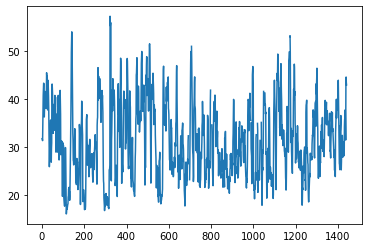

In [12]:
plt.plot(cellsdnnm[38,0])

Text(0.5, 0, 'Time (min)')

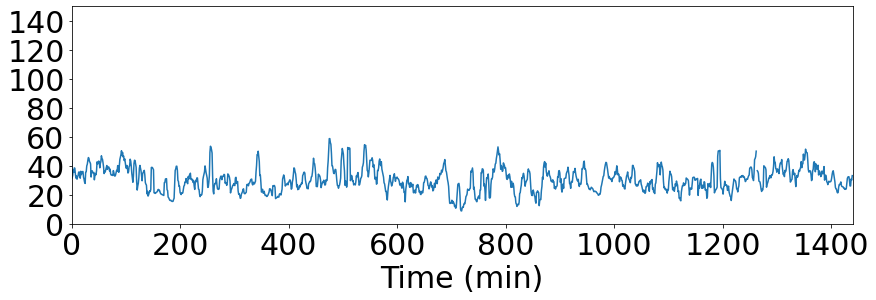

In [13]:
xlabel=np.arange(1440)
plt.figure(figsize=(14,4))
plt.plot(xlabel,cellsdnnm[38,1])
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.xlim(0,1440)
plt.ylim(0,150)
plt.xlabel('Time (min)',fontsize=30)

Text(0.5, 0, 'Time (min)')

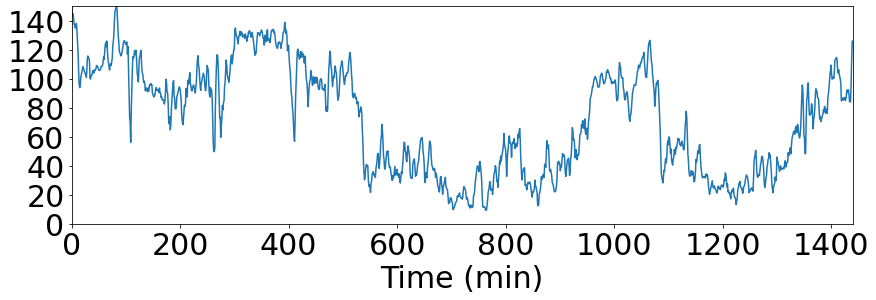

In [14]:
xlabel=np.arange(1440)
plt.figure(figsize=(14,4))
plt.plot(xlabel,cellsdnnc[38,1])
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.xlim(0,1440)
plt.ylim(0,150)
plt.xlabel('Time (min)',fontsize=30)

In [15]:
len(cellsdnnc)

46

In [11]:
meansdnnm=np.zeros((len(cellsdnnm[:,0]),3))
meancsim=np.zeros((len(cellcsim[:,0]),3))
meancvim=np.zeros((len(cellcvim[:,0]),3))

meansdnnc=np.zeros((len(cellsdnnc[:,0]),3))
meancsic=np.zeros((len(cellcsic[:,0]),3))
meancvic=np.zeros((len(cellcvic[:,0]),3))

stdsdnnm=np.zeros((len(cellsdnnm[:,0]),3))
stdcsim=np.zeros((len(cellcsim[:,0]),3))
stdcvim=np.zeros((len(cellcvim[:,0]),3))

stdsdnnc=np.zeros((len(cellsdnnc[:,0]),3))
stdcsic=np.zeros((len(cellcsic[:,0]),3))
stdcvic=np.zeros((len(cellcvic[:,0]),3))

In [12]:
for i in range(len(cellsdnnm[:,0])):
    for j in range(3):
        if meansdnnm[i,j] is not None:
            meansdnnm[i,j]=np.mean(cellsdnnm[i,j])
            stdsdnnm[i,j]=np.std(cellsdnnm[i,j])
        else:
            meansdnnm[i,j]=np.nan
            stdsdnnm[i,j]=np.nan
        if meancsim[i,j] is not None:
            meancsim[i,j]=np.mean(cellcsim[i,j])
            stdcsim[i,j]=np.std(cellcsim[i,j])
        else:
            meancsim[i,j]=np.nan
            stdcsim[i,j]=np.nan
        if meancvim[i,j] is not None:
            meancvim[i,j]=np.mean(cellcvim[i,j])
            stdcvim[i,j]=np.std(cellcvim[i,j])
        else:
            meancvim[i,j]=np.nan
            stdcvim[i,j]=np.nan
        if meansdnnc[i,j] is not None:
            meansdnnc[i,j]=np.mean(cellsdnnc[i,j])
            stdsdnnc[i,j]=np.std(cellsdnnc[i,j])
        else:
            meansdnnc[i,j]=np.nan
            stdsdnnc[i,j]=np.nan
        if meancsic[i,j] is not None:
            meancsic[i,j]=np.mean(cellcsic[i,j])
            stdcsic[i,j]=np.std(cellcsic[i,j])
        else:
            meancsic[i,j]=np.nan
            stdcsic[i,j]=np.nan
        if meancvic[i,j] is not None:
            meancvic[i,j]=np.mean(cellcvic[i,j])
            stdcvic[i,j]=np.std(cellcvic[i,j])
        else:
            meancvic[i,j]=np.nan
            stdcvic[i,j]=np.nan
    

C:\Users\ljr\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\ljr\anaconda3\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\ljr\anaconda3\lib\site-packages\numpy\core\_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\ljr\anaconda3\lib\site-packages\numpy\core\_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
C:\Users\ljr\anaconda3\lib\site-packages\numpy\core\_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [13]:
def plotmeanstd(filesname,mean,std):
    regex=re.compile(r'\d+')
    plt.figure(figsize=(10,10))
    for i in range(len(filesname)):
        textn=regex.search(filesname[i]).group(0)
        text1=textn+'1'
        text2=textn+'2'
        text3=textn+'3'
        if ~np.isnan(mean[i,0]):
            plt.scatter(mean[i,0],std[i,0])
            #plt.annotate(text1,xy = (mean[i,0],std[i,0]),xytext = (mean[i,0]+0.5,std[i,0]+0.5))
        if ~np.isnan(mean[i,1]):
            plt.scatter(mean[i,1],std[i,1])
            #plt.annotate(text2,xy = (mean[i,1],std[i,1]),xytext = (mean[i,1]+0.5,std[i,1]+0.5))
        if ~np.isnan(mean[i,2]):
            plt.scatter(mean[i,2],std[i,2])
            #plt.annotate(text3,xy = (mean[i,2],std[i,2]),xytext = (mean[i,2]+0.5,std[i,2]+0.5))

In [14]:
def dataprepare(filesname,mean,std):
    regex=re.compile(r'\d+')
    lm=[]
    ls=[]
    name=[]
    for i in range(len(filesname)):
        textn=regex.search(filesname[i]).group(0)
        text1=textn+'1'
        text2=textn+'2'
        text3=textn+'3'
        if ~np.isnan(mean[i,0]):
            lm.append(mean[i,0])
            ls.append(std[i,0])
            name.append(text1)
            #plt.annotate(text1,xy = (mean[i,0],std[i,0]),xytext = (mean[i,0]+0.5,std[i,0]+0.5))
        if ~np.isnan(mean[i,1]):
            lm.append(mean[i,1])
            ls.append(std[i,1])
            name.append(text2)
            #plt.annotate(text2,xy = (mean[i,1],std[i,1]),xytext = (mean[i,1]+0.5,std[i,1]+0.5))
        if ~np.isnan(mean[i,2]):
            lm.append(mean[i,2])
            ls.append(std[i,2])
            name.append(text3)
            #plt.annotate(text3,xy = (mean[i,2],std[i,2]),xytext = (mean[i,2]+0.5,std[i,2]+0.5))
    data=np.c_[lm,ls]
    return data,name

In [15]:
~np.isnan(meansdnnm[0,0])

False

In [16]:
datamssm,namesm=dataprepare(filesmother,meansdnnm,stdsdnnm)
datamscm,namecm=dataprepare(filesmother,meancsim,stdcsim)
datamsvm,namevm=dataprepare(filesmother,meancvim,stdcvim)

datamssc,namesc=dataprepare(fileschild,meansdnnc,stdsdnnc)
datamscc,namecc=dataprepare(fileschild,meancsic,stdcsic)
datamsvc,namevc=dataprepare(fileschild,meancvic,stdcvic)

In [22]:
def kplot(data,names):
    dis=np.min(data[:,1])/15
    kmeansm= KMeans(n_clusters=3,max_iter=2000, tol=0.01)
    kmeansm.fit(data)
    clsm = kmeansm.predict(data)
    txt = names
    plt.figure(figsize=(10,10))
    plt.scatter(data[clsm==0,0],data[clsm==0,1],color='red')
    plt.scatter(data[clsm==1,0],data[clsm==1,1],color='blue')
    plt.scatter(data[clsm==2,0],data[clsm==2,1],color='yellow')
    for i in range(len(clsm)):
        plt.annotate(txt[i],xy = (data[i,0],data[i,1]),xytext = (data[i,0]+dis,data[i,1]+dis))

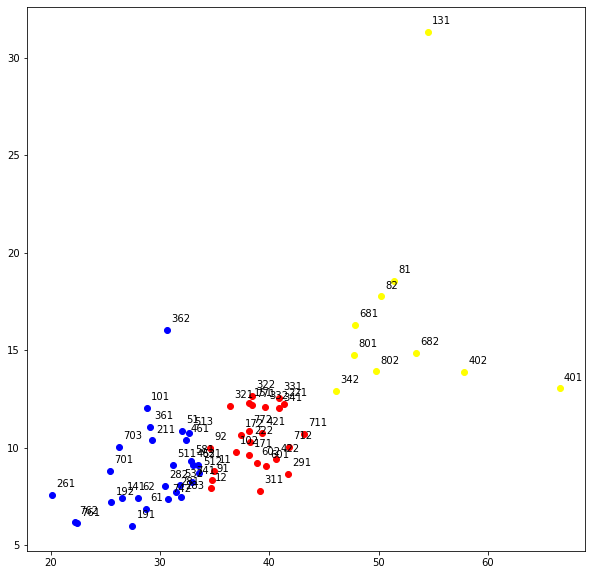

In [42]:
#kplot(datamssm,namesm)

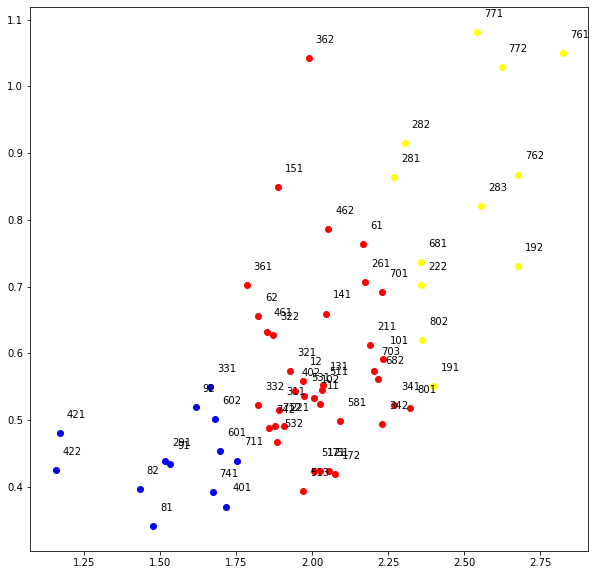

In [43]:
#kplot(datamscm,namecm)

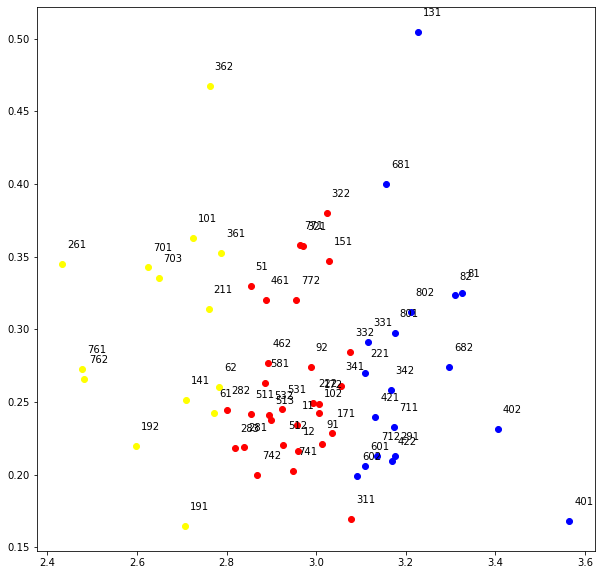

In [44]:
#kplot(datamsvm,namevm)

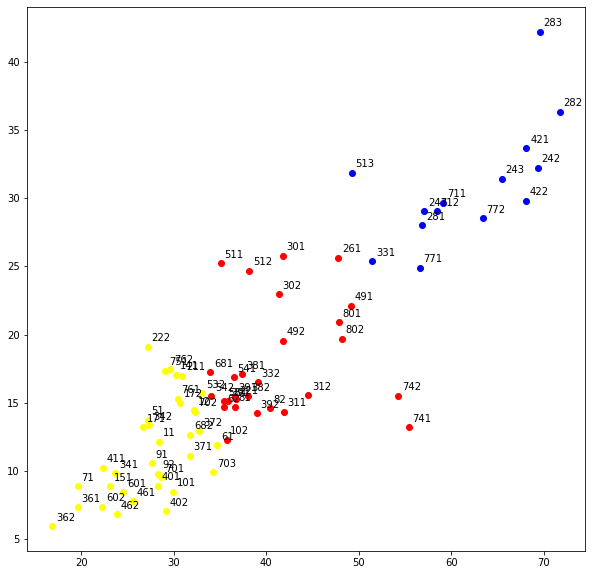

In [45]:
#kplot(datamssc,namesc)

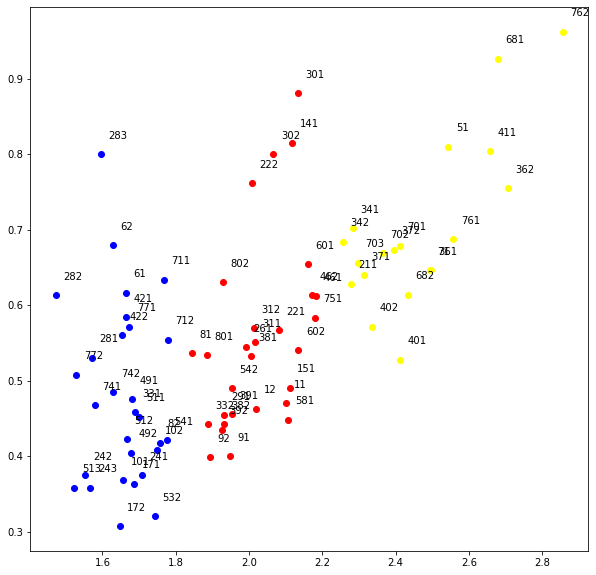

In [46]:
#kplot(datamscc,namecc)

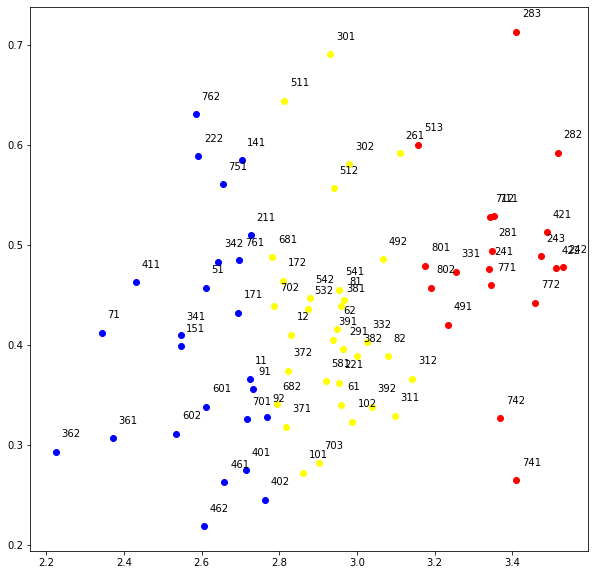

In [47]:
#kplot(datamsvc,namevc)

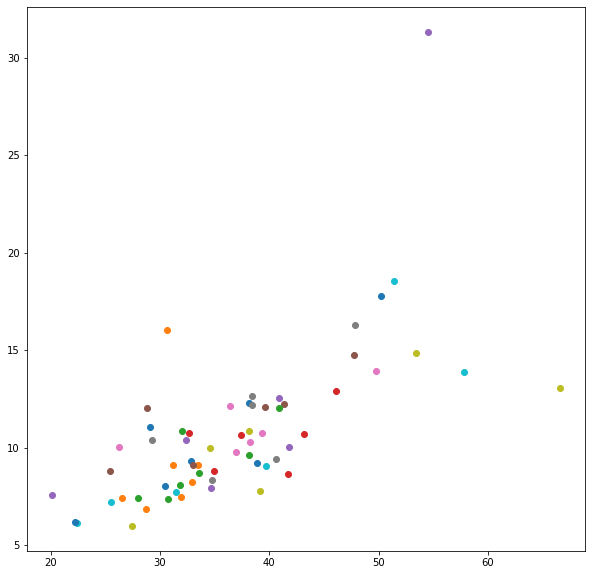

In [48]:
#plotmeanstd(filesmother,meansdnnm,stdsdnnm)

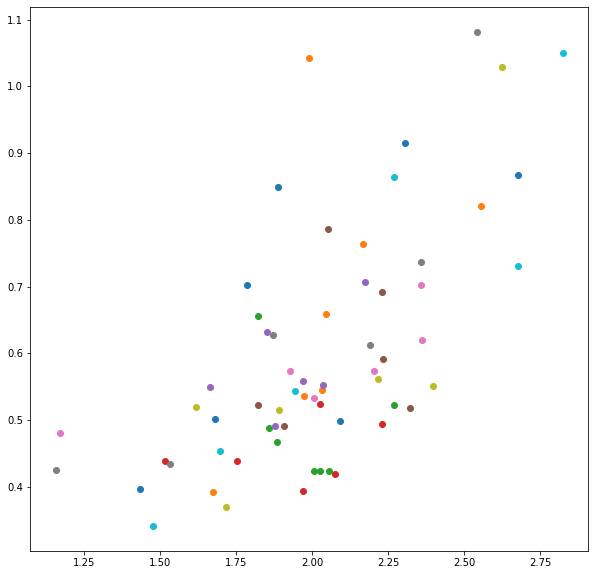

In [49]:
#plotmeanstd(filesmother,meancsim,stdcsim)

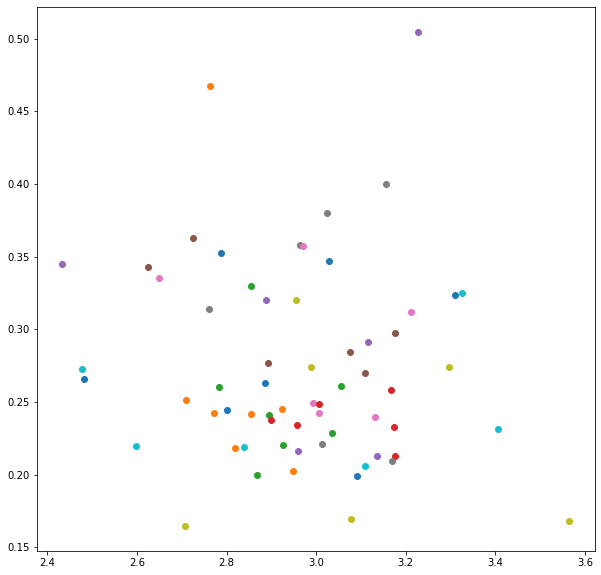

In [50]:
#plotmeanstd(filesmother,meancvim,stdcvim)

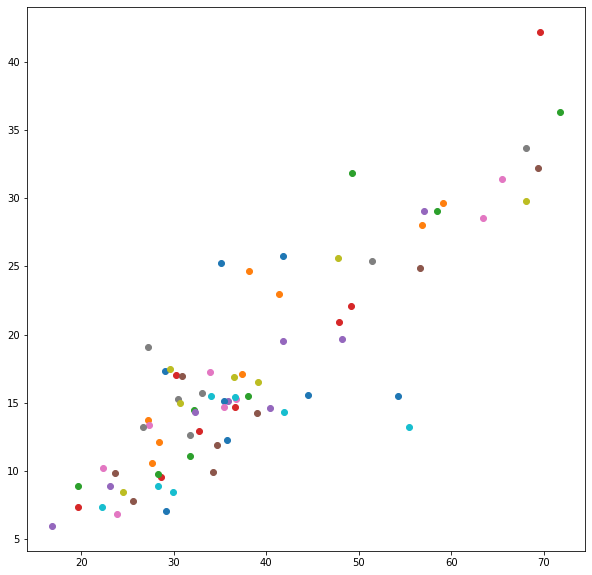

In [51]:
#plotmeanstd(fileschild,meansdnnc,stdsdnnc)

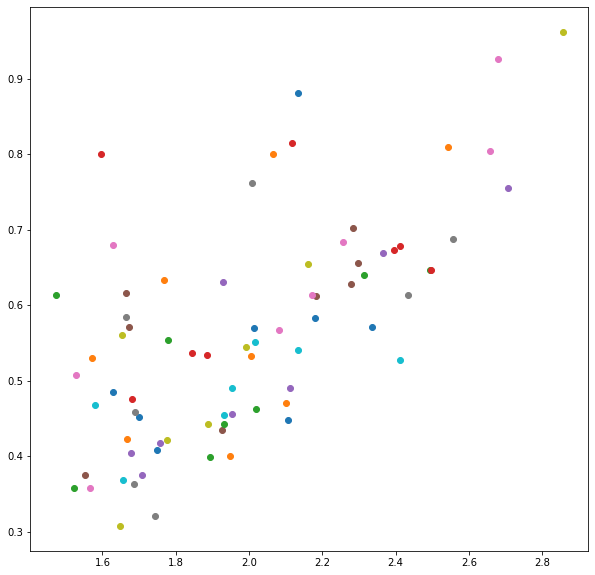

In [52]:
#plotmeanstd(fileschild,meancsic,stdcsic)

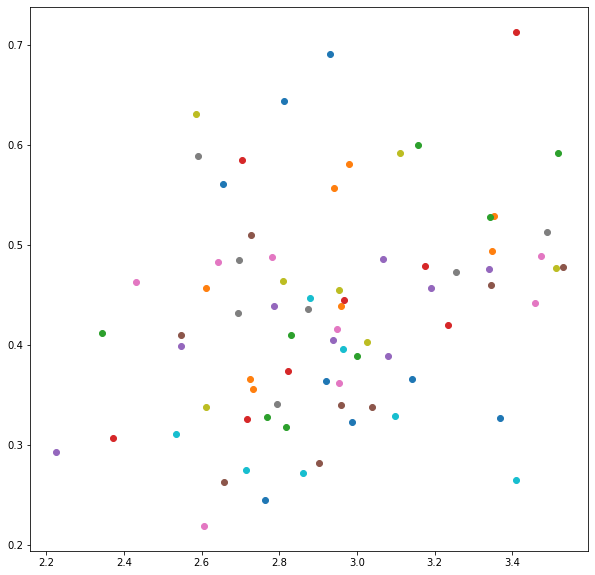

In [53]:
#plotmeanstd(fileschild,meancvic,stdcvic)

In [54]:
#for i in range(len(clsm)):
    #plt.annotate(txt[i],xy = (testm[i,0],testm[i,1]),xytext = (testm[i,0]+1,testm[i,1]+1))

In [17]:
def missingv(cellsdnn,cellcsi,cellcvi):
    for i in range(len(cellsdnn[:,0])):
        datat11=cellsdnn[i,0]
        datat12=cellsdnn[i,1]
        datat13=cellsdnn[i,2]
        if len(datat11)!=0:
            cellsdnn[i,0]=datat11.fillna(datat11.mean())
        if len(datat12)!=0:
            cellsdnn[i,1]=datat12.fillna(datat12.mean())
        if len(datat13)!=0:
            cellsdnn[i,2]=datat13.fillna(datat13.mean())
    for i in range(len(cellcsi[:,0])):
        datat21=cellcsi[i,0]
        datat22=cellcsi[i,1]
        datat23=cellcsi[i,2]
        if len(datat21)!=0:
            cellcsi[i,0]=datat21.fillna(datat21.mean())
        if len(datat22)!=0:
            cellcsi[i,1]=datat22.fillna(datat22.mean())
        if len(datat23)!=0:
            cellcsi[i,2]=datat23.fillna(datat23.mean())
    for i in range(len(cellcvi[:,0])):
        datat31=cellcvi[i,0]
        datat32=cellcvi[i,1]
        datat33=cellcvi[i,2]
        if len(datat31)!=0:
            cellcvi[i,0]=datat31.fillna(datat31.mean())
        if len(datat32)!=0:
            cellcvi[i,1]=datat32.fillna(datat32.mean())
        if len(datat33)!=0:
            cellcvi[i,2]=datat33.fillna(datat33.mean())
    return cellsdnn,cellcsi,cellcvi

In [18]:
cellsdnnm,cellcsim,cellcvim=missingv(cellsdnnm,cellcsim,cellcvim)
cellsdnnc,cellcsic,cellcvic=missingv(cellsdnnc,cellcsic,cellcvic)

In [147]:
def maxmin(data):
    maxm=0
    minm=10000000
    for i in range(len(data[:,0])):
        data11=np.nan
        data12=np.nan
        data13=np.nan
        data11t=np.nan
        data12t=np.nan
        data13t=np.nan
        if len(data[i,0])!=0:
            data11=max(data[i,0])
            data11t=min(data[i,0])
        if len(data[i,1])!=0:
            data12=max(data[i,1])
            data12t=min(data[i,1])
        if len(data[i,2])!=0:
            data13=max(data[i,2])
            data13t=min(data[i,2])
        datamt=np.nanmax([data11,data12,data13])
        datamit=np.nanmin([data11t,data12t,data13t])
        if datamt>=maxm:
            maxm=datamt
            print(i,maxm)
        if datamit<=minm:
            minm=datamit
    return maxm,minm

In [159]:
maxsm,minsm=maxmin(cellcsic)

0 4.6803
2 5.1648
4 5.326
21 6.2227
24 6.2663


<ipython-input-147-679b7a3250fc>:20: RuntimeWarning: All-NaN axis encountered
  datamt=np.nanmax([data11,data12,data13])
<ipython-input-147-679b7a3250fc>:21: RuntimeWarning: All-NaN axis encountered
  datamit=np.nanmin([data11t,data12t,data13t])


In [20]:
maxsm,minsm=maxmin(cellsdnnm)
maxcm,mincm=maxmin(cellcsim)
maxvm,minvm=maxmin(cellcvim)

maxsc,minsc=maxmin(cellsdnnc)
maxcc,mincc=maxmin(cellcsic)
maxvc,minvc=maxmin(cellcvic)


<ipython-input-19-7e438b488e4e>:20: RuntimeWarning: All-NaN axis encountered
  datamt=np.nanmax([data11,data12,data13])
<ipython-input-19-7e438b488e4e>:21: RuntimeWarning: All-NaN axis encountered
  datamit=np.nanmin([data11t,data12t,data13t])


In [21]:
print(maxsm,minsm)
print(maxcm,mincm)
print(maxvm,minvm)

print(maxsc,minsc)
print(maxcc,mincc)
print(maxvc,minvc)

132.5824 3.8126
6.2668 0.3576
4.235585842 1.130365164
152.0244 4.88
6.2663 0.5206
4.364181306 1.230342557


In [24]:
def normalize(x, maxa,mina,axis=0):
    return [(float(i)-mina)/float(maxa-mina) for i in x]

In [25]:
cellpsm=np.empty((len(filesmother),3),dtype=object)
cellpsc=np.empty((len(fileschild),3),dtype=object)

cellpcm=np.empty((len(filesmother),3),dtype=object)
cellpcc=np.empty((len(fileschild),3),dtype=object)

cellpvm=np.empty((len(filesmother),3),dtype=object)
cellpvc=np.empty((len(fileschild),3),dtype=object)

In [26]:
def preprocess(data,maxa,mina,cellp):
    for i in range(len(data[:,0])):
        data11=data[i,0]
        data12=data[i,1]
        data13=data[i,2]
        if len(data11)!=0:
            datan1=normalize(data11,maxa,mina,axis=0)
            dataout1=datan1-np.mean(datan1)
            datar1=[round(i,1) for i in dataout1]
            #datar1=[i+0.5 for i in datar1]
            cellp[i,0]=datar1
            #cellp[i,0]=datan1
        if len(data12)!=0:
            datan2=normalize(data12,maxa,mina,axis=0)
            dataout2=datan2-np.mean(datan2)
            datar2=[round(i,1) for i in dataout2]
            #datar2=[i+0.5 for i in datar2]
            cellp[i,1]=datar2
            #cellp[i,1]=datan2
        if len(data13)!=0:
            datan3=normalize(data13,maxa,mina,axis=0)
            dataout3=datan3-np.mean(datan3)
            #datar3=datan3-np.mean(datan3)
            datar3=[round(i,1) for i in dataout3]
            #datar3=[i+0.5 for i in datar3]
            cellp[i,2]=datar3
            #cellp[i,2]=datan3
    return cellp

In [27]:
cellpsmt=preprocess(cellsdnnm,maxsm,minsm,cellpsm)
cellpcmt=preprocess(cellcsim,maxcm,mincm,cellpcm)
cellpvmt=preprocess(cellcvim,maxvm,minvm,cellpvm)

cellpsct=preprocess(cellsdnnc,maxsc,minsc,cellpsc)
cellpcct=preprocess(cellcsic,maxcc,mincc,cellpcc)
cellpvct=preprocess(cellcvic,maxvc,minvc,cellpvc)

In [160]:
print(min(cellpcct[24,0]))

-0.2


<ipython-input-116-9b140624ea36>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=cm.get_cmap('hsv',11)


Text(0.5, 0, 'Time (min)')

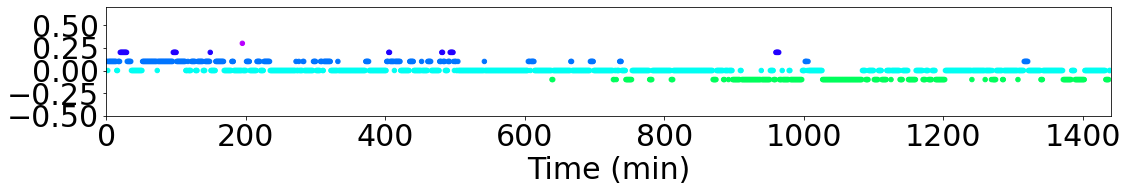

In [116]:
xlabel=np.arange(1440)
plt.figure(figsize=(18,2))
cmap=cm.get_cmap('hsv',11)
plt.scatter(xlabel,cellpsmt[10,0],c=cellpsmt[10,0],cmap=cmap,s=20,vmin=-0.5, vmax=0.5)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.xlim(0,1440)
plt.ylim(-0.5,0.7)
plt.xlabel('Time (min)',fontsize=30)

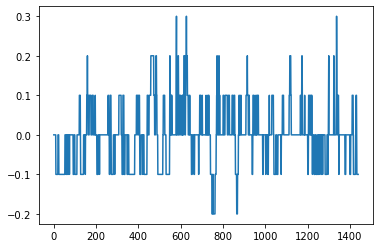

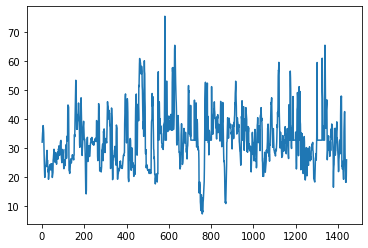

In [63]:
plt.plot(cellpsmt[2,0])
plt.show()
plt.plot(cellsdnnm[2,0])

In [31]:
def rrc(y,yi,path,aaa):
    #mpl.use('Agg') 
    ya=np.array(y)
    yia=np.array(yi)
    matrix=np.zeros((len(ya),len(yia)))
    matrixc=np.zeros((len(ya),len(yia)))-100
    matrixx=np.zeros((len(ya),len(yia)))
    if np.max(yia)>=np.max(ya):
        maxx=np.max(yia)
    else:
        maxx=np.max(ya)
    if np.min(yia)<=np.min(ya):
        minx=np.min(yia)
    else:
        minx=np.min(ya)

    for i in range(len(ya)):
        indf=np.where(yia==ya[i])
        iii=indf[0]
        yyy=np.array([np.nan]*len(yia))
        yyyt=np.array([np.nan]*len(yia))
        xlabel=np.zeros((1,len(ya)))+i
        matrixx[:,i]=xlabel
        if len(iii)!=0:
            yyy[iii]=ya[i]
            yyyt[iii]=iii
            matrix[:,i]=yyyt
            matrixc[:,i]=yyy
    for j in range(len(matrixc[:,0])):
        inddd=np.where(matrixc[j,:]==-100)
        inddd0=np.array(inddd[0])
        matrixc[j,inddd0]=np.nan
    plt.figure(figsize=(1,1))
    plt.axis('off')
    dx=np.arange(len(ya))
    #plt.plot(dx,dx,linewidth=1,color='black')
    #plt.xlim(0,len(ya))
    #plt.ylim(0,len(ya))
    plt.scatter([i for i in matrixx],[j for j in matrix],c=[k for k in matrixc],cmap='hsv',s=1,vmin=-0.5, vmax=0.5)
    plt.xlim(0,len(ya))
    plt.ylim(0,len(ya))
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.savefig(path+aaa,bbox_inches='tight',pad_inches=0.0)
    #plt.xlabel('Mother',fontsize=14)
    #plt.ylabel('Infant',fontsize=14)
    #plt.title(aaa,fontsize=14)
    #plt.colorbar()
    #plt.show()

In [32]:
def rrcout(y,yi):
    #mpl.use('Agg') 
    ya=np.array(y)
    yia=np.array(yi)
    matrix=np.zeros((len(ya),len(yia)))
    matrixc=np.zeros((len(ya),len(yia)))-100
    matrixx=np.zeros((len(ya),len(yia)))
    if np.max(yia)>=np.max(ya):
        maxx=np.max(yia)
    else:
        maxx=np.max(ya)
    if np.min(yia)<=np.min(ya):
        minx=np.min(yia)
    else:
        minx=np.min(ya)

    for i in range(len(ya)):
        indf=np.where(yia==ya[i])
        iii=indf[0]
        yyy=np.array([np.nan]*len(yia))
        yyyt=np.array([np.nan]*len(yia))
        xlabel=np.zeros((1,len(ya)))+i
        matrixx[:,i]=xlabel
        if len(iii)!=0:
            yyy[iii]=ya[i]
            yyyt[iii]=iii
            matrix[:,i]=yyyt
            matrixc[:,i]=yyy
    for j in range(len(matrixc[:,0])):
        inddd=np.where(matrixc[j,:]==-100)
        inddd0=np.array(inddd[0])
        matrixc[j,inddd0]=np.nan
    plt.figure(figsize=(20,16))
    plt.axis('off')
    dx=np.arange(len(ya))
    #plt.plot(dx,dx,linewidth=1,color='black')
    #plt.xlim(0,len(ya))
    #plt.ylim(0,len(ya))
    cmap=cm.get_cmap('hsv',11)
    plt.scatter([i for i in matrixx],[j for j in matrix],c=[k for k in matrixc],cmap=cmap,s=1,vmin=-0.5, vmax=0.5)
    plt.xlim(0,len(ya))
    plt.ylim(0,len(ya))
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    cbar=plt.colorbar()
    tick_font_size = 30
    cbar.ax.tick_params(labelsize=tick_font_size)
    cbar.locator=mpl.ticker.MaxNLocator(nbins=11)
    cbar.update_ticks()
    #plt.savefig(path+aaa,bbox_inches='tight',pad_inches=0.0)
    #plt.xlabel('Mother',fontsize=14)
    #plt.ylabel('Infant',fontsize=14)
    #plt.title(aaa,fontsize=14)
    #plt.colorbar()
    plt.show()

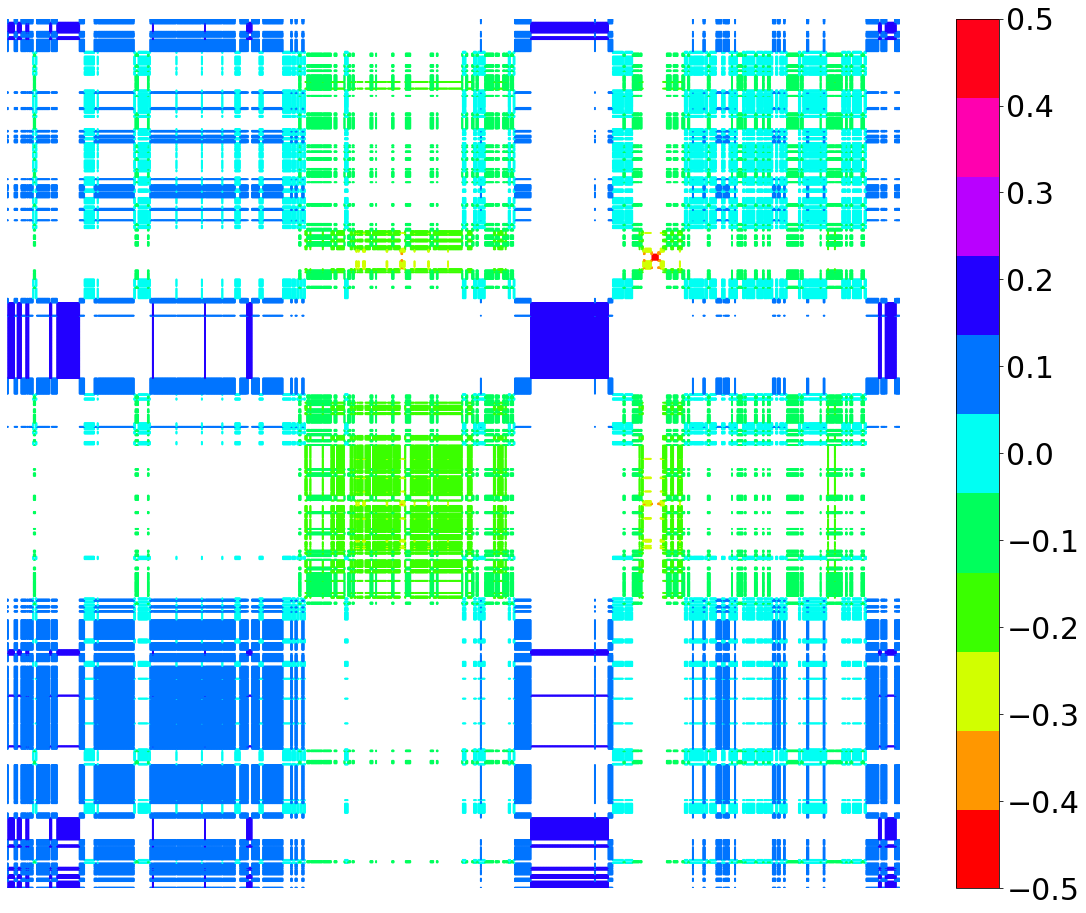

In [33]:
rrcout(cellpvct[-2,0],cellpvct[-2,0])

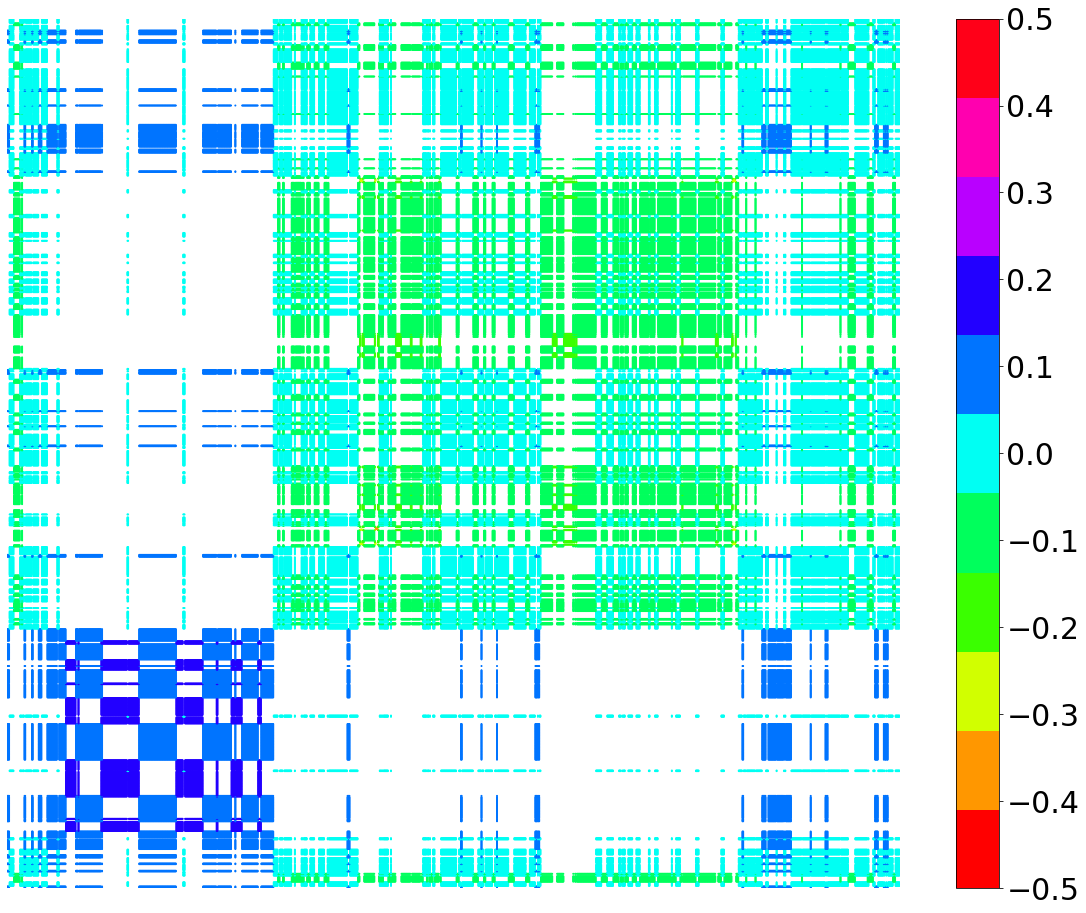

In [34]:
rrcout(cellpvmt[-2,0],cellpvmt[-2,0])

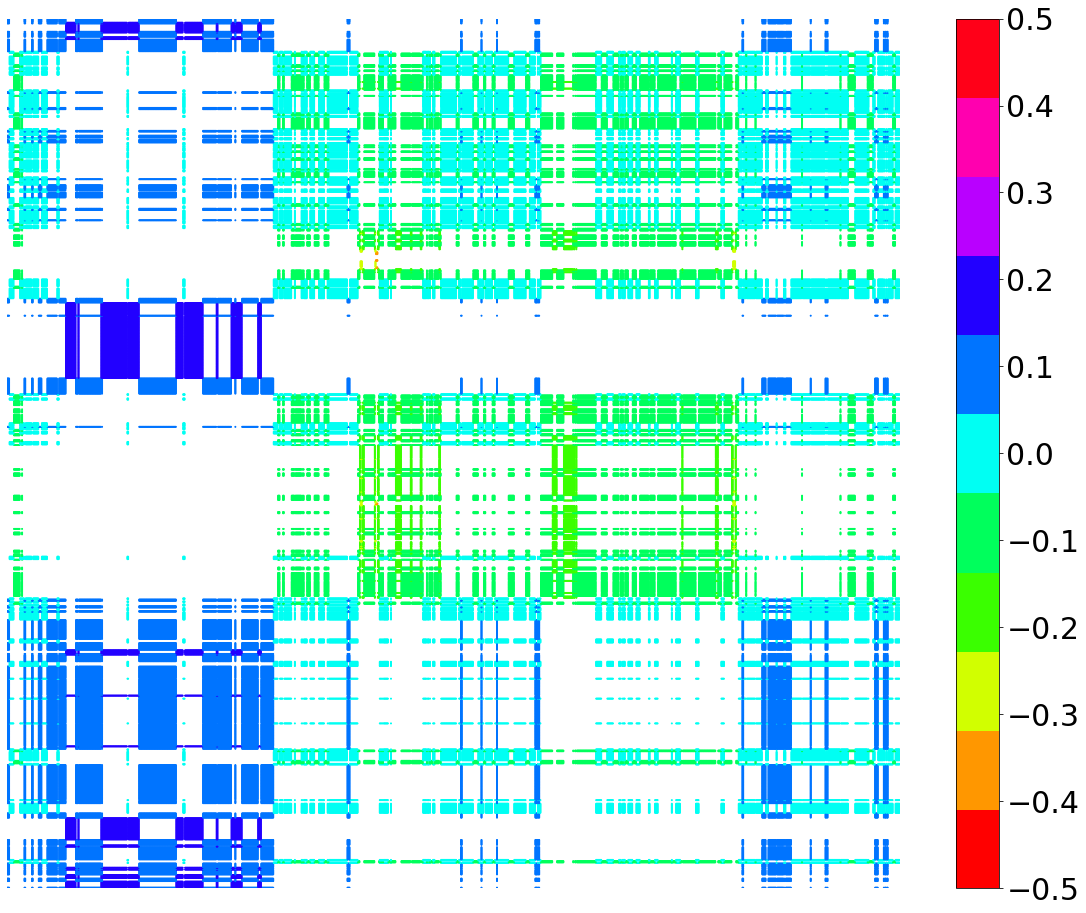

In [35]:
rrcout(cellpvmt[-2,0],cellpvct[-2,0])

Text(0.5, 0, 'Time (min)')

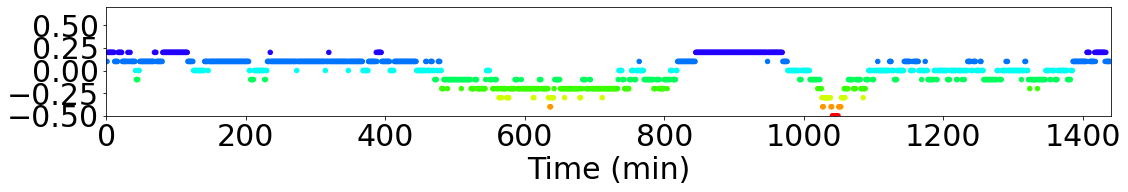

In [44]:
xlabel=np.arange(1440)
plt.figure(figsize=(18,2))
cmap=cm.get_cmap('hsv',11)
plt.scatter(xlabel,cellpvct[-2,0],c=cellpvct[-2,0],cmap=cmap,s=20,vmin=-0.5, vmax=0.5)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.xlim(0,1440)
plt.ylim(-0.5,0.7)
plt.xlabel('Time (min)',fontsize=30)

Text(0.5, 0, 'Time (min)')

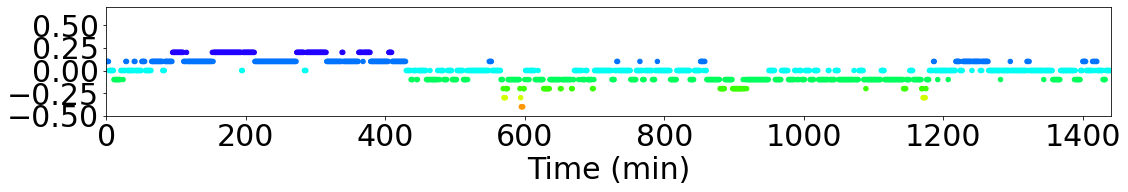

In [45]:
xlabel=np.arange(1440)
plt.figure(figsize=(18,2))
cmap=cm.get_cmap('hsv',11)
plt.scatter(xlabel,cellpvmt[-2,0],c=cellpvmt[-2,0],cmap=cmap,s=20,vmin=-0.5, vmax=0.5)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.xlim(0,1440)
plt.ylim(-0.5,0.7)
plt.xlabel('Time (min)',fontsize=30)

In [70]:
np.mean(cellpsct[2,0])

0.0009722222222222311

In [71]:
pathms=r'D:\KyotoUdata\all\dp\mother\sdnn'

<ipython-input-64-05bfcd45cb50>:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(1,1))


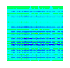

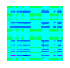

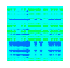

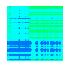

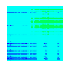

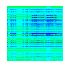

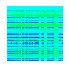

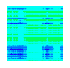

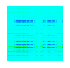

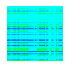

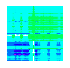

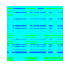

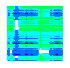

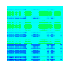

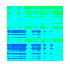

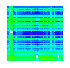

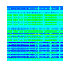

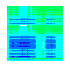

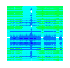

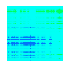

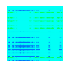

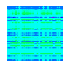

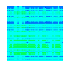

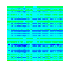

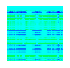

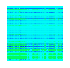

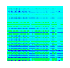

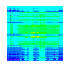

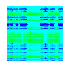

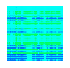

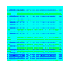

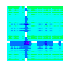

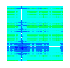

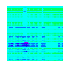

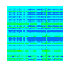

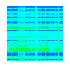

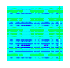

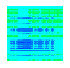

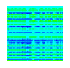

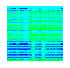

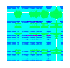

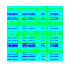

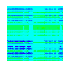

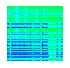

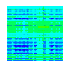

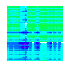

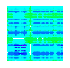

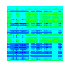

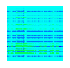

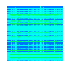

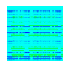

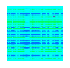

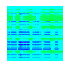

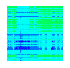

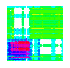

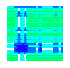

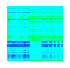

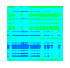

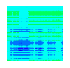

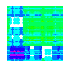

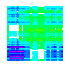

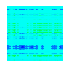

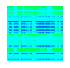

In [73]:
for i in range(len(cellpsmt[:,0])):
    data1=cellpsmt[i,0]
    data2=cellpsmt[i,1]
    data3=cellpsmt[i,2]
    if data1 is not None:
        aaa='\\'+filesmother[i].split('.')[0]+'1'
        rrc(data1,data1,pathms,aaa)
    if data2 is not None:
        aaa='\\'+filesmother[i].split('.')[0]+'2'
        rrc(data2,data2,pathms,aaa)
    if data3 is not None:
        aaa='\\'+filesmother[i].split('.')[0]+'3'
        rrc(data3,data3,pathms,aaa)

In [ ]:
pathcm=r'D:\KyotoUdata\all\onedaym\csi'

In [ ]:
for i in range(len(cellpcmt[:,0])):
    data1=cellpcmt[i,0]
    data2=cellpcmt[i,1]
    data3=cellpcmt[i,2]
    if data1 is not None:
        aaa='\\'+filesmother[i].split('.')[0]+'1'
        #rrc(data1,data1,pathcm,aaa)
    if data2 is not None:
        aaa='\\'+filesmother[i].split('.')[0]+'2'
        #rrc(data2,data2,pathcm,aaa)
    if data3 is not None:
        aaa='\\'+filesmother[i].split('.')[0]+'3'
        #rrc(data3,data3,pathcm,aaa)

In [ ]:
pathvm=r'D:\KyotoUdata\all\onedaym\cvi'

In [ ]:
for i in range(len(cellpvmt[:,0])):
    data1=cellpvmt[i,0]
    data2=cellpvmt[i,1]
    data3=cellpvmt[i,2]
    if data1 is not None:
        aaa='\\'+filesmother[i].split('.')[0]+'1'
        #rrc(data1,data1,pathvm,aaa)
    if data2 is not None:
        aaa='\\'+filesmother[i].split('.')[0]+'2'
        #rrc(data2,data2,pathvm,aaa)
    if data3 is not None:
        aaa='\\'+filesmother[i].split('.')[0]+'3'
        #rrc(data3,data3,pathvm,aaa)

In [ ]:
pathcs=r'D:\KyotoUdata\all\onedayc\sdnn'

In [ ]:
for i in range(len(cellpsct[:,0])):
    data1=cellpsct[i,0]
    data2=cellpsct[i,1]
    data3=cellpsct[i,2]
    if data1 is not None:
        aaa='\\'+fileschild[i].split('.')[0]+'1'
        #rrc(data1,data1,pathcs,aaa)
    if data2 is not None:
        aaa='\\'+fileschild[i].split('.')[0]+'2'
        #rrc(data2,data2,pathcs,aaa)
    if data3 is not None:
        aaa='\\'+fileschild[i].split('.')[0]+'3'
        #rrc(data3,data3,pathcs,aaa)

In [ ]:
pathcc=r'D:\KyotoUdata\all\onedayc\csi'

In [ ]:
for i in range(len(cellpcct[:,0])):
    data1=cellpcct[i,0]
    data2=cellpcct[i,1]
    data3=cellpcct[i,2]
    if data1 is not None:
        aaa='\\'+fileschild[i].split('.')[0]+'1'
        #rrc(data1,data1,pathcc,aaa)
    if data2 is not None:
        aaa='\\'+fileschild[i].split('.')[0]+'2'
        #rrc(data2,data2,pathcc,aaa)
    if data3 is not None:
        aaa='\\'+fileschild[i].split('.')[0]+'3'
        #rrc(data3,data3,pathcc,aaa)

In [ ]:
pathvc=r'D:\KyotoUdata\all\onedayc\cvi'

In [ ]:
for i in range(len(cellpvct[:,0])):
    data1=cellpvct[i,0]
    data2=cellpvct[i,1]
    data3=cellpvct[i,2]
    if data1 is not None:
        aaa='\\'+fileschild[i].split('.')[0]+'1'
        #rrc(data1,data1,pathvc,aaa)
    if data2 is not None:
        aaa='\\'+fileschild[i].split('.')[0]+'2'
        #rrc(data2,data2,pathvc,aaa)
    if data3 is not None:
        aaa='\\'+fileschild[i].split('.')[0]+'3'
        #rrc(data3,data3,pathvc,aaa)